In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
path = 'data/Yongjin_Questionnaire.csv'
travel = pd.read_csv(path)
travel





,Timestamp,Do you love to travel?,"When selecting a travel mode, what is your preference?","When planning a trip, do you prefer",How do you usually document your travels?,Your approach to trying new foods while traveling is:,Your preferred souvenir from a trip is
0,2023/11/15 4:45:12 pm GMT,Yes,Exploring on foot or using public transportation,Exploring new cities and cultures.,Taking lots of photos and sharing them online.,Always want to try local dishes and specialties.,Local artwork or handmade crafts
1,2023/11/15 4:45:58 pm GMT,Yes,Exploring on foot or using public transportation,Exploring new cities and cultures.,Focusing on the experience without much docume...,Always want to try local dishes and specialties.,local food
2,2023/11/15 4:47:31 pm GMT,Yes,Driving or renting a car for flexibility.,Exploring new cities and cultures.,Taking lots of photos and sharing them online.,Like trying new foods but with a bit of caution.,Local artwork or handmade crafts
3,2023/11/15 4:53:47 pm GMT,Yes,Exploring on foot or using public transportation,Exploring new cities and cultures.,Focusing on the experience without much docume...,Always want to try local dishes and specialties.,Local artwork or handmade crafts
4,2023/11/15 4:54:42 pm GMT,Yes,Driving or renting a car for flexibility.,Exploring new cities and cultures.,Taking lots of photos and sharing them online.,Always want to try local dishes and specialties.,Local artwork or handmade crafts
5,2023/11/15 4:55:28 pm GMT,Maybe,Exploring on foot or using public transportation,Exploring new cities and cultures.,Keeping a travel journal or writing postcards.,Always want to try local dishes and specialties.,Local artwork or handmade crafts
6,2023/11/15 4:55:51 pm GMT,Yes,Exploring on foot or using public transportation,Exploring new cities and cultures.,Focusing on the experience without much docume...,Always want to try local dishes and specialties.,Local artwork or handmade crafts
7,2023/11/15 4:58:05 pm GMT,Yes,Driving or renting a car for flexibility.,Relaxing in nature or at a quiet resort.,Focusing on the experience without much docume...,Like trying new foods but with a bit of caution.,Local artwork or handmade crafts
8,2023/11/15 4:58:13 pm GMT,Yes,Exploring on foot or using public transportation,Exploring new cities and cultures.,Focusing on the experience without much docume...,Like trying new foods but with a bit of caution.,item with the destination's name or emblem lik...
9,2023/11/15 4:59:37 pm GMT,Yes,Driving or renting a car for flexibility.,Exploring new cities and cultures.,Taking lots of photos and sharing them online.,Like trying new foods but with a bit of caution.,Local artwork or handmade crafts


In [9]:
headers = travel.columns.tolist()[1:]
#headers = [header for header in headers if header != "Timestamp"]
short_name = ['Preference','Transport','TravelMode','Document','Food', 'Souvenir']
title_name_dict = dict(zip(headers, short_name))
print(title_name_dict)


{'Do you love to travel?': 'Preference', 'When selecting a travel mode, what is your preference?': 'Transport', 'When planning a trip, do you prefer': 'TravelMode', 'How do you usually document your travels?': 'Document', 'Your approach to trying new foods while traveling is:': 'Food', 'Your preferred souvenir from a trip is': 'Souvenir'}


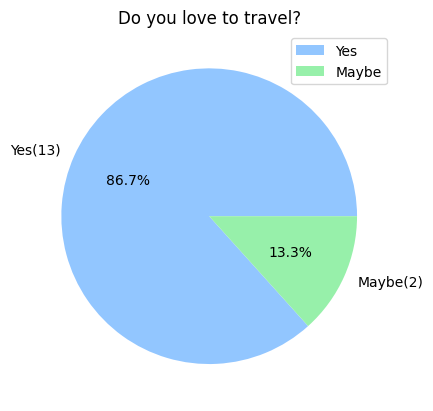

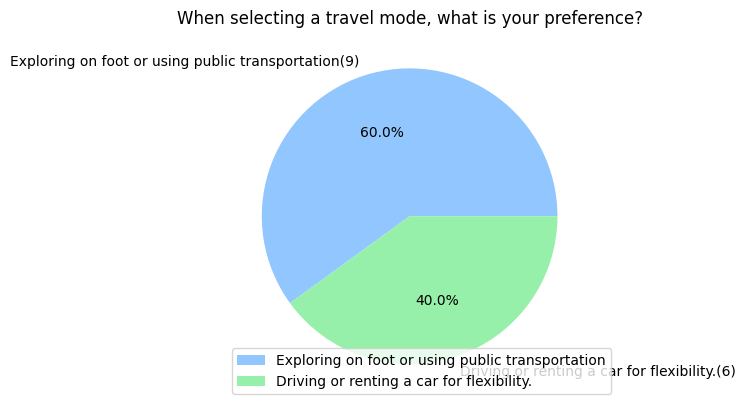

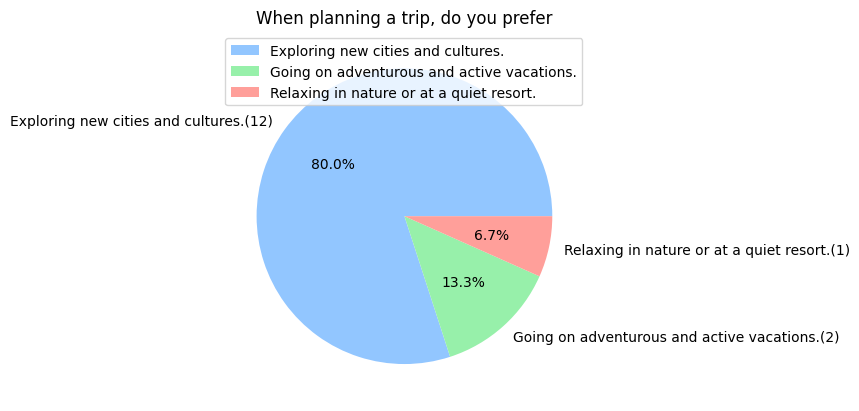

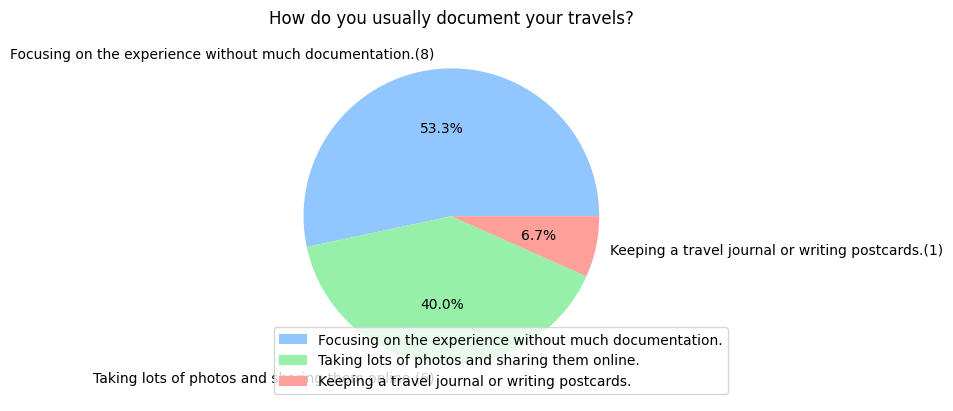

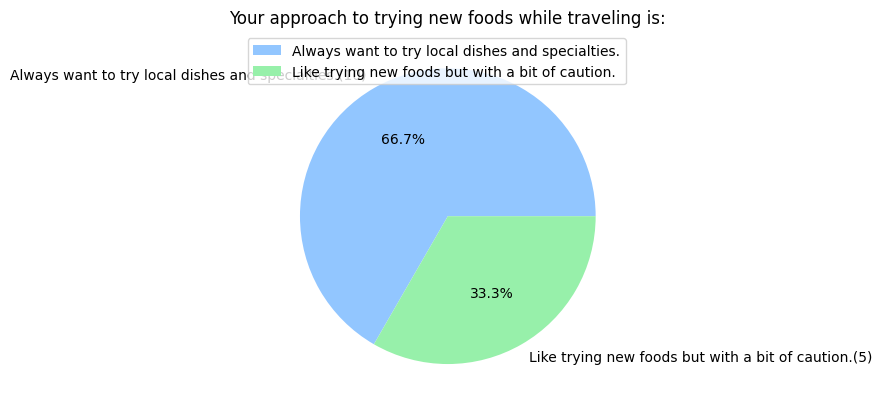

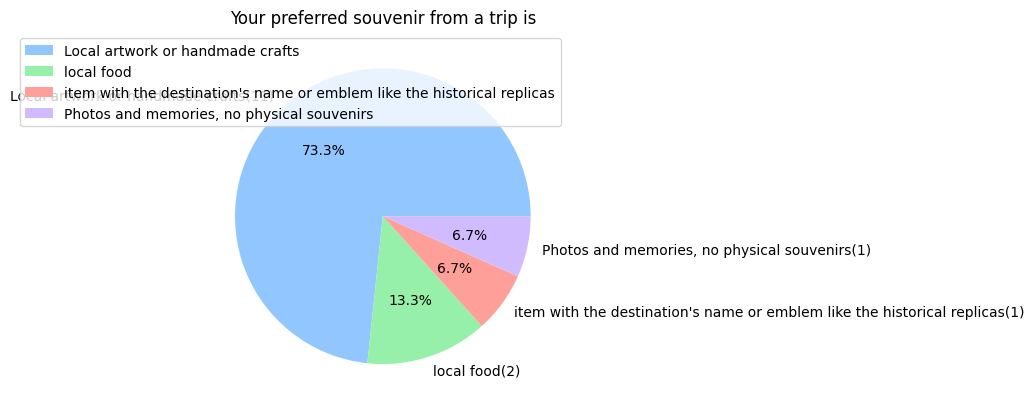

In [11]:
for header in travel.head():
    if header != "Timestamp":
        options_count= travel[header].value_counts()
     #class
          #object(attrbute, methods)
        #preference_count is a panda's object, can use the object's funtion to extract info(sth like dictionary(?))
        options = options_count.keys().tolist()
        values = np.array( options_count.tolist())
        name_list = [option + "(" + str(value)+ ")"for option, value in zip(options, values) ]
       
        plt.pie(values, labels = name_list,autopct='%1.1f%%')
        plt.title(header)
        #plt.labels = plt.pie.name + '('header(data) +')'    
        plt.legend(options)
        plt.show() 
        plt.style.use('seaborn-v0_8-pastel')


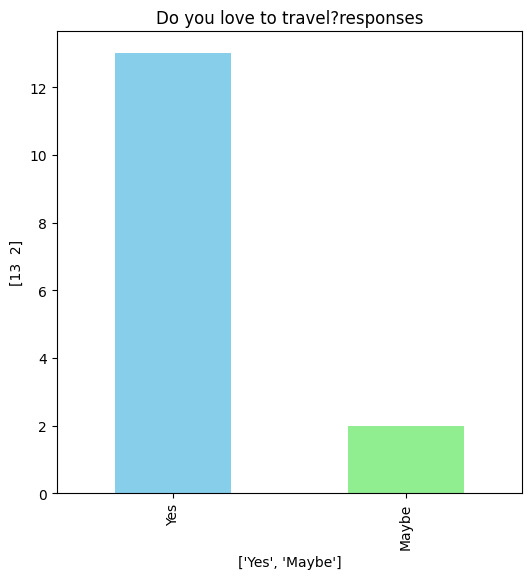

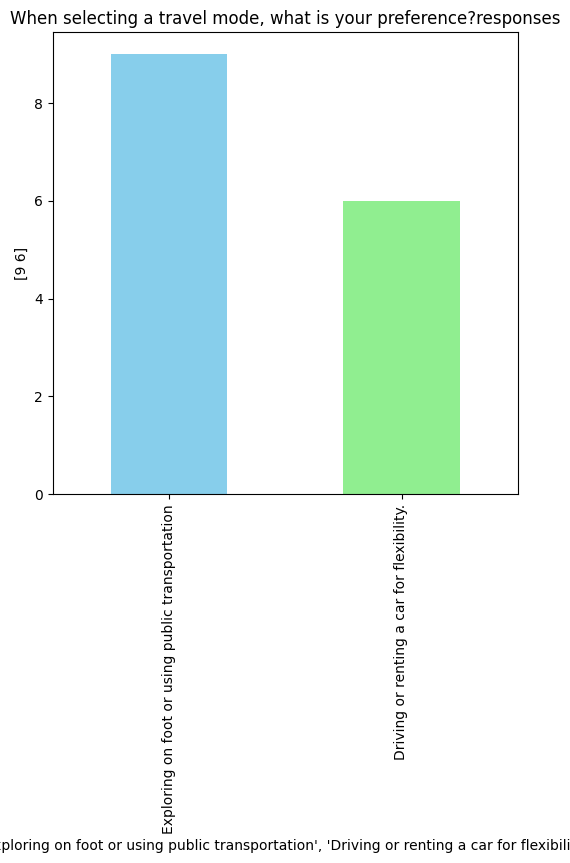

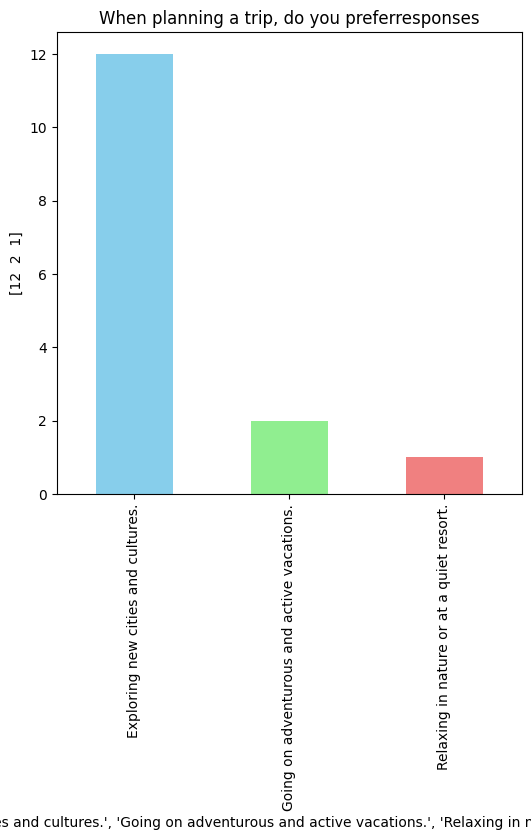

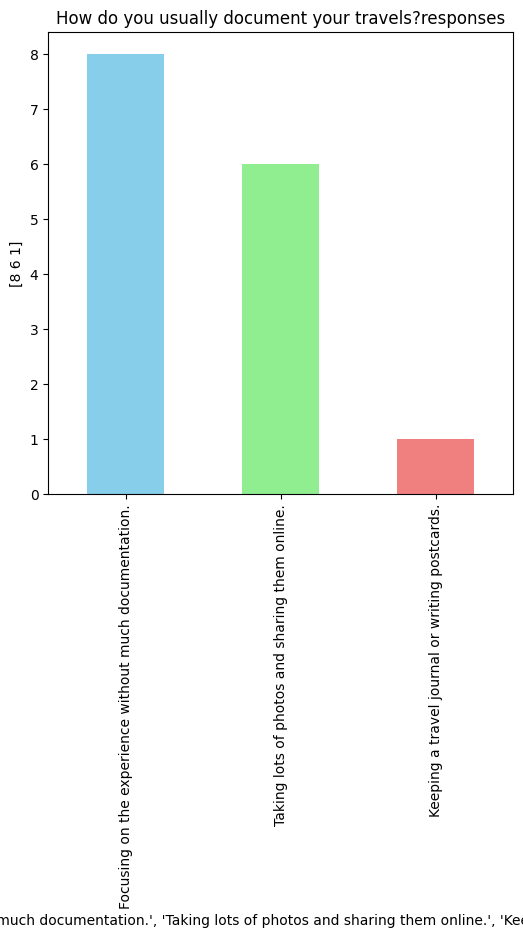

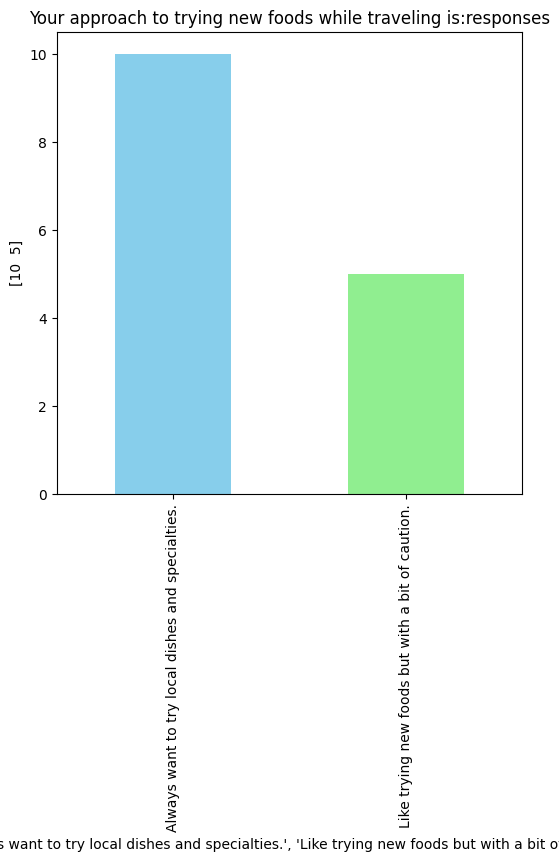

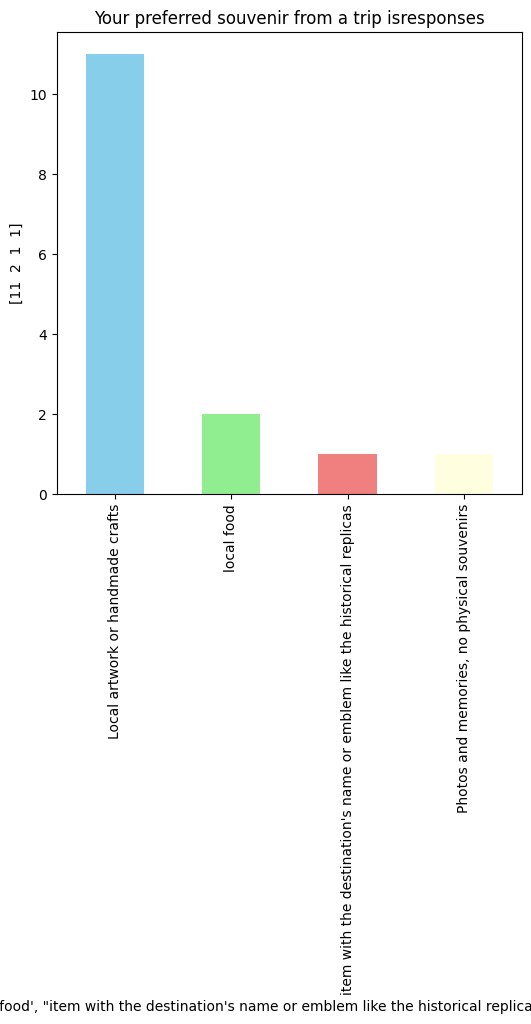

In [67]:
for header in travel.head():
    if header != "Timestamp":
        options_count= travel[header].value_counts()
        options = options_count.keys().tolist()
        values = np.array( options_count.tolist())
        
        custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']
        plt.figure(figsize=(6, 6))
        options_count.plot(kind='bar', color=custom_colors)
        plt.title(header + 'responses')
        plt.xlabel(options)
        plt.ylabel(values)
        plt.show()

In [25]:
travel_without_timestamp = travel.drop(travel.columns[[0,1]], axis=1)
count_by_rows = travel_without_timestamp.apply(tuple, axis = 1).value_counts()
count_by_rows



(Exploring on foot or using public transportation, Exploring new cities and cultures., Taking lots of photos and sharing them online., Always want to try local dishes and specialties., Local artwork or handmade crafts)                                                   2
(Driving or renting a car for flexibility., Exploring new cities and cultures., Taking lots of photos and sharing them online., Like trying new foods but with a bit of caution., Local artwork or handmade crafts)                                                          2
(Exploring on foot or using public transportation, Exploring new cities and cultures., Focusing on the experience without much documentation., Always want to try local dishes and specialties., Local artwork or handmade crafts)                                           2
(Exploring on foot or using public transportation, Exploring new cities and cultures., Focusing on the experience without much documentation., Always want to try local dishes and specialt

In [100]:
#plan = travel_without_timestamp.apply(tuple, axis = 1).value_counts().idxmax()
#print(plan)
travel_without_timestamp_tuple = travel_without_timestamp.apply(tuple, axis = 1)
travel_without_timestamp_tuple_counts = travel_without_timestamp_tuple.value_counts()
max_idx = travel_without_timestamp_tuple_counts.max()
print(max_idx)
# plan = travel_without_timestamp.apply(tuple, axis = 1).value_counts().idxmax
plan = travel_without_timestamp_tuple[travel_without_timestamp_tuple.tolist() == max_idx]


print(f"The most common combination in the DataFrame is {plan} with a count of {plan_count}.")

2


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed